FloatSlider(value=0.0, description='Hue:', max=179.0, step=1.0)

FloatSlider(value=0.0, description='Saturation:', max=255.0, step=1.0)

FloatSlider(value=0.0, description='Value:', max=255.0, step=1.0)

Button(description='Segmentar', style=ButtonStyle())

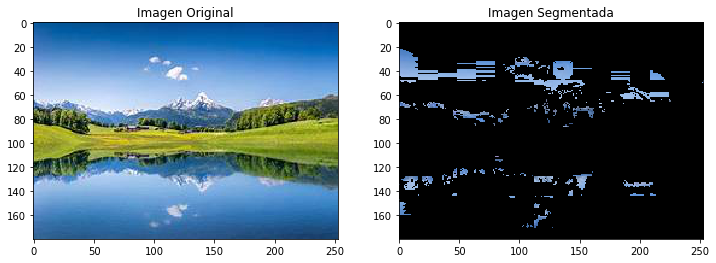

In [2]:
import cv2
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, Layout
from IPython.display import display
import matplotlib.pyplot as plt  # Agrega esta línea para importar matplotlib.pyplot

# Función para la segmentación de la imagen
def segmentar_imagen(hue, saturation, value):
    # Convertir los valores HSV ingresados a un rango válido (0-179 para H, 0-255 para S y V)
    hue = int(hue % 180)
    saturation = int(np.clip(saturation, 0, 255))
    value = int(np.clip(value, 0, 255))

    # Crear un rango de color en HSV
    lower_bound = np.array([hue - 10, saturation - 50, value - 50])
    upper_bound = np.array([hue + 10, saturation + 50, value + 50])

    # Filtrar la imagen original basado en el rango de color
    mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
    resultado = cv2.bitwise_and(img, img, mask=mask)

    # Mostrar la imagen original y la imagen segmentada
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Imagen Segmentada')
    plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))

    plt.show()

# Cargar la imagen de ejemplo
img = cv2.imread('paisaje.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Crear controles interactivos
hue_slider = widgets.FloatSlider(value=0, min=0, max=179, step=1, description='Hue:')
saturation_slider = widgets.FloatSlider(value=0, min=0, max=255, step=1, description='Saturation:')
value_slider = widgets.FloatSlider(value=0, min=0, max=255, step=1, description='Value:')
boton_segmentar = widgets.Button(description='Segmentar')

# Función que se ejecuta al hacer clic en el botón
def on_button_click(b):
    segmentar_imagen(hue_slider.value, saturation_slider.value, value_slider.value)

# Conectar la función al evento de clic del botón
boton_segmentar.on_click(on_button_click)

# Mostrar los controles y el botón en el cuaderno
display(hue_slider)
display(saturation_slider)
display(value_slider)
display(boton_segmentar)

